# Data provider 

This notebook explains that how you can use deepsource9 functions to provide data to feed CNN.

In [1]:
import sys
import glob
import numpy as np
import deepsource as ds

import matplotlib.pylab as plt
from matplotlib import gridspec
from matplotlib.colors import LogNorm
%matplotlib inline

"PreProcessDataProvider" class makes random patches from them by specifiying container directories and names conditions of images and coresponding models files. Image and model file names will be fetched using glob. Model files includes gounrd truth of point source positions. You can make an instance like: 

In [2]:
def kernel1(cat):
    return ds.horn_kernel(cat,radius=15,step_height=2)
def kernel2(cat):
    return ds.gaussian_kernel(cat,sigma=10)

def kernels(cat):
    return kernel2(kernel1(cat))

images_path=['../data/image'+str(i+1)+'.fits' for i in range(3)]
models_path=['../data/image'+str(i+1)+'.txt' for i in range(3)]
dp = ds.GeneralDataProvider(images_path=images_path,models_path=models_path,margin=0,
                                     nx=300, ny=300,kernels=kernels, b_n=0.05, alpha=0.5)

number of files:  3 , number of channels:  1


nx and nx are patch size. You can specify the number of required patches and call the innstance to get a random patch. It returns a patch of image and corresponding demand. They look like:

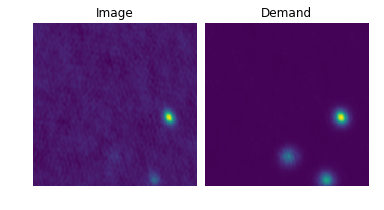

In [3]:
image,demand = dp(1)

gs = gridspec.GridSpec(1, 2)
plt.figure(figsize=(6,3)) 

ax = plt.subplot(gs[0, 0])
ax.imshow(image[0,:,:,0])
ax.set_title('Image')
plt.axis('off');

ax = plt.subplot(gs[0, 1])
ax.imshow(demand[0,:,:,0])
ax.set_title('Demand')
plt.axis('off');

plt.subplots_adjust(wspace=0.05)